# Web Page Object Detection Using Template Images

In this notebook, we are experimenting with tackling one of the first problems we want to solve: finding html control and object in a page. The type of objects that we want to find in this first step are:

- html buttons (so we can click on them later)
- html input text controls (so we can type) 
- table item where we eventuaklly will be able to read values

## Technologies to Try:

###  OpenCV template matching
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

Template Matching is a method for searching and finding the location of a template image in a larger image. It simply slides the template image over the input image (as in 2D convolution) and compares the template and patch of input image under the template image. Several comparison methods are implemented in OpenCV. It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

#### OpenCV template matching comparisions
    Each comparision is different cost function that is used to find a strong correlation.
    In some limited experiments, we found that all comparision funtions work well for us with the exception of one. So, for now we will pick one. 
   

# First experiment, finding the object (template) "item_with_delete" inside the image "one_hero". 

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_full = cv2.imread('all_heroes_no_magneta.jpg',0)
img_full2 = img_full.copy()
img = cv2.imread('one_hero.jpg',0)
img2 = img.copy()
template = cv2.imread('item_with_delete.jpg',0)
w, h = template.shape[::-1]
wi, h1 = img.shape[::-1]
w, h, wi, h1

(229, 45, 868, 1032)

METHOD:   4
-12091544.0 43394280.0 (70, 25) (24, 479)
top_left: (24, 479) bottom_right:  (253, 528)


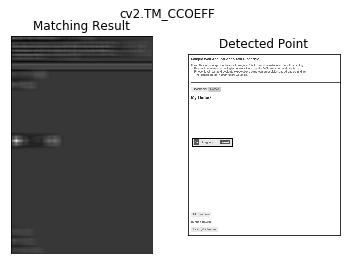

METHOD:   5
-0.28472962975502014 0.9997715950012207 (71, 121) (24, 479)
top_left: (24, 479) bottom_right:  (253, 528)


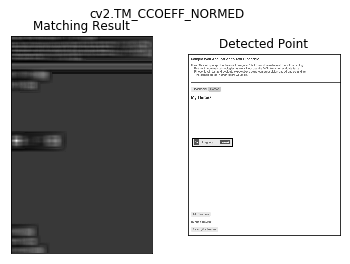

METHOD:   2
420783648.0 522182240.0 (12, 484) (452, 114)
top_left: (452, 114) bottom_right:  (681, 163)


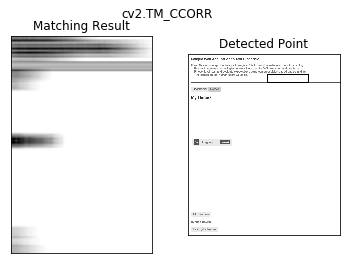

METHOD:   3
0.8857776522636414 0.9999775290489197 (18, 25) (24, 479)
top_left: (24, 479) bottom_right:  (253, 528)


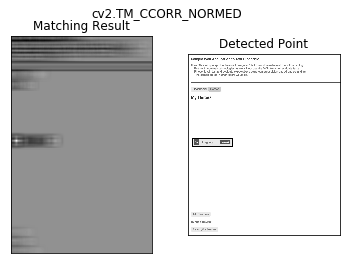

METHOD:   0
20800.0 114444704.0 (24, 479) (71, 25)
top_left: (24, 479) bottom_right:  (253, 528)


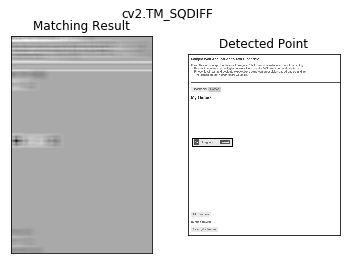

METHOD:   1
4.622569031198509e-05 0.23437395691871643 (24, 479) (71, 25)
top_left: (24, 479) bottom_right:  (253, 528)


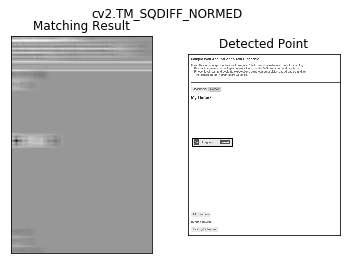

In [60]:


# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    
    print("METHOD:  ", method)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    print( min_val, max_val, min_loc, max_loc)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h + 4)

    print("top_left:", top_left, "bottom_right: " , bottom_right)
    cv2.rectangle(img,top_left, bottom_right , 0, 4)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

# Defining a reusable function 

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [62]:

def find_template(template_img, page_img): 
    # This function gets and object (image_template) and a page 
    # Finds the objects ans saves to disk the resulting image showing 
    # where the object
    img = cv2.imread(page_img,0)
    img2 = img.copy()
    template = cv2.imread(template_img,0)
    w, h = template.shape[::-1]
    wi, h1 = img.shape[::-1]  
        
    img = img2.copy()
    
    method = 4  #cv2.TM_CCOEFF
    # Apply template Matching
    res = cv2.matchTemplate(img,template,4)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # calculate and draw boxes
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h + 4)    
    return top_left, bottom_right
    
top_left, bottom_right = find_template('item_with_delete.jpg','one_hero.jpg')
print("top_left:", top_left, "bottom_right: " , bottom_right)

top_left: (24, 479) bottom_right:  (253, 528)


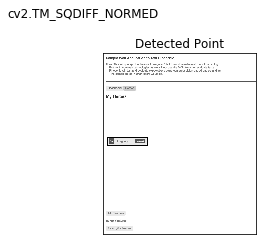

In [63]:
# thius function will show the found rectangle

color = 0;
line_width = 4
def show_found_object_rectangle():    
    cv2.rectangle(img,top_left, bottom_right , color, line_width)    
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    
show_found_object_rectangle()

In [64]:
top_left, bottom_right = find_template('item_with_delete.jpg','all_heroes.png')
print("top_left:", top_left, "bottom_right: " , bottom_right)

top_left: (39, 381) bottom_right:  (268, 430)


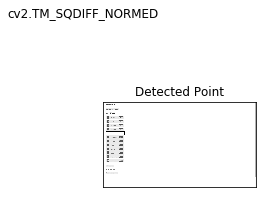

In [65]:
# thius function will show the found rectangle

color = 0;
line_width = 4
def show_found_object_rectangle(image):    
    cv2.rectangle(image,top_left, bottom_right , color, line_width)    
    plt.subplot(122),plt.imshow(image,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    
show_found_object_rectangle(img_full)